## Appendix Table A6: Non-Latinx First-Year Enrollments at Private Institutions Since 2001 Without Admissions Control

from White Flight in Higher Education? The Case of Hispanic-Serving Institutions

by Laura Hamilton, Charlie Eaton, and Simon Cheng

In [1]:
quietly {

use /Users/Charlie/Dropbox/Stata_Notebooks/racedebtstrat/hdef19802019.dta, clear
keep if control==2 & iclevel==1 & year>1989 & ftfeftotlt>100 & ftfeftotlt<.
    
keep if year>2000
    
foreach var in efbkaat efhispt efwhitt efaiant efasiat {
quietly    gen pctt`var'= t`var' / teftotlt * 100
quietly gen lnftf`var'=log(ftf`var')
    quietly gen lnt`var'=log(t`var')
}
foreach var in cpopam cpopas cpopbl cpopwh cpophi populationam populationas populationbl populationhi populationwh {
        gen ln`var'=log(`var')
    }

quietly gen lnftfeftotlt=log(ftfeftotlt)

**More robust would be discontinuity
quietly gen hispserve=0 if pcttefhispt!=.
quietly replace hispserve=1 if pcttefhispt>=25 & pcttefhispt<.

xtset unitid year

**create var for year in which event occurs observation year of event for subject**
by unitid: gen transition=year if hispserv==1 & l.hispserv==0

**create var for year in which event occurs in all observations for all years for subject**
by unitid: egen hispserveyear = min(transition)

**generate a var for the number of years relative to the year of the event (e.g. + or - 2 years)

gen hispserveyeardiff= year-hispserveyear
    
**bin up year differences larger than absolute value of 10**
replace hispserveyeardiff =10 if hispserveyeardiff <9999 & hispserveyeardiff >10
replace hispserveyeardiff =-10 if hispserveyeardiff <-10
    
    gen afteryrs=0
replace afteryrs=hispserveyeardiff if hispserveyeardiff>0 & hispserveyeardiff<.
gen beforeyrs=0
replace beforeyrs=hispserveyeardiff if hispserveyeardiff<0
gen beforeafteryrs=0
replace beforeafteryrs=hispserveyeardiff if hispserveyeardiff!=.
    
gen switchers = (hispserveyeardiff<.)
    label var beforeyrs "before years"
    label var afteryrs "after years"
    label var beforeafteryrs "before and after years"
    label var lnftfefwhitt "white"
    label var lnftfefasiat "Asian"
    label var lnftfefbkaat "Black"
    label var admitpct "% admitted"
}
sum beforeyrs afteryrs beforeafteryrs



. sum beforeyrs afteryrs beforeafteryrs

    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
   beforeyrs |     17,422   -.2817128    1.489942        -10          0
    afteryrs |     17,422    .0735851    .6731359          0         10
beforeafte~s |     17,422   -.2081277    1.647574        -10         10


In [2]:
*** Check and clear xt

    qui xtset
    qui set line 105
    qui set more off

 ** Public schools, Y is logged
    foreach nam in ftfefwhitt ftfefasiat ftfefbkaat {
        
est clear
        qui eststo SwPost: reghdfe ln`nam' beforeyrs afteryrs lnftfeftotlt   ///
        lnpop* lncpop* i.year if switchers==1, absorb(unitid) cluster(unitid)

        qui eststo counterPost: reghdfe ln`nam' beforeyrs afteryrs lnftfeftotlt   ///
        lnpop* lncpop* i.year if pcttefhispt>=15, absorb(unitid) cluster(unitid)
        
        qui eststo NSwPost: reghdfe ln`nam' beforeyrs afteryrs lnftfeftotlt   ///
        lnpop* lncpop* i.year, absorb(unitid) cluster(unitid)
        
        qui eststo Swdiff: reghdfe ln`nam' afteryrs beforeafteryrs lnftfeftotlt   ///
        lnpop* lncpop* i.year if switchers==1, absorb(unitid) cluster(unitid)

        qui eststo counterdiff: reghdfe ln`nam' afteryrs beforeafteryrs lnftfeftotlt   ///
        lnpop* lncpop* i.year if pcttefhispt>15, absorb(unitid) cluster(unitid)
        
        qui eststo NSwdiff: reghdfe ln`nam' afteryrs beforeafteryrs lnftfeftotlt   ///
        lnpop* lncpop* i.year, absorb(unitid) cluster(unitid)
        
        esttab SwPost counterPost NSwPost Swdiff counterdiff NSwdiff, star(* .05 ** .01 *** .001) ///
        stats(r2_a_within N_clust N, fmt(2 %9.0fc %9.0fc) label("r2" "schools" "N")) ///
        keep(beforeyrs afteryrs beforeafteryrs  ) se(%9.3fc) b(%9.3fc) ///        
        order(beforeyrs afteryrs beforeafteryrs  ) ///
        label mtitle("Switchers" "Counterfac" "All" "Switchers" "Counterfac ""All") ///
        prehead("`: var label ln`nam'' enrollment") nonotes modelwidth(10)
            
   qui esttab SwPost counterPost NSwPost Swdiff counterdiff NSwdiff using tables/ta6_privafter2000`nam'.rtf, star(* .05 ** .01 *** .001) ///
        stats(r2_a_within N_clust N, fmt(2 %9.0fc %9.0fc) label("r2" "schools" "N")) ///
        keep(beforeyrs afteryrs beforeafteryrs  ) se(%9.3fc) b(%9.3fc) ///
        order(beforeyrs afteryrs beforeafteryrs  ) ///
        label mtitle("Switchers" "Counter- factual" "All" "Switchers" "Counter- factual ""All") replace ///
        title("\b `: var label ln`nam'' enrollment") nonotes onecell compress
}






white enrollment
                            (1)           (2)           (3)           (4)           (5)           (6)   
                      Switchers    Counterfac           All     Switchers    Counterfac           All   
--------------------------------------------------------------------------------------------------------
before years             -0.019        -0.008        -0.019***                                          
                        (0.014)       (0.007)       (0.005)                                             

after years              -0.047**      -0.033***     -0.041***     -0.029***     -0.025*       -0.021*  
                        (0.017)       (0.007)       (0.005)       (0.008)       (0.010)       (0.009)   

before and after y~s                                               -0.019        -0.008        -0.019***
                                                                  (0.014)       (0.007)       (0.005)   
-------------------------------

In [11]:
quietly {

use /Users/Charlie/Dropbox/Stata_Notebooks/racedebtstrat/hdef19802019.dta, clear
keep if control<3 & iclevel==1 & year>1989 & ftfeftotlt>100 & ftfeftotlt<.
    
keep if admitpct!=.
    
foreach var in efbkaat efhispt efwhitt efaiant efasiat {
quietly    gen pctt`var'= t`var' / teftotlt * 100
quietly gen lnftf`var'=log(ftf`var')
    quietly gen lnt`var'=log(t`var')
}
foreach var in cpopam cpopas cpopbl cpopwh cpophi populationam populationas populationbl populationhi populationwh {
        gen ln`var'=log(`var')
    }

quietly gen lnftfeftotlt=log(ftfeftotlt)

**More robust would be discontinuity
quietly gen hispserve=0 if pcttefhispt!=.
quietly replace hispserve=1 if pcttefhispt>=25 & pcttefhispt<.

xtset unitid year

**create var for year in which event occurs observation year of event for subject**
by unitid: gen transition=year if hispserv==1 & l.hispserv==0

**create var for year in which event occurs in all observations for all years for subject**
by unitid: egen hispserveyear = min(transition)

**generate a var for the number of years relative to the year of the event (e.g. + or - 2 years)

gen hispserveyeardiff= year-hispserveyear
    
**bin up year differences larger than absolute value of 10**
replace hispserveyeardiff =10 if hispserveyeardiff <9999 & hispserveyeardiff >10
replace hispserveyeardiff =-10 if hispserveyeardiff <-10
replace hispserveyeardiff=hispserveyeardiff+10
    
gen switchers = (hispserveyeardiff<.)
}

In [12]:
qui {
    
    local Yvar "lnftfefwhitt"
    local race "White"
    
  * Public school

    reghdfe `Yvar' b10.hispserveyeardiff lnftfeftotlt lnpop* lncpop* if switchers==1 & control==1, absorb(unitid year) cluster(unitid)
    estimates store pub

    margins i.hispserveyeardiff

    qui marginsplot, ciopts(recast(rspike)) xline(10, lcolor(gs9) lpattern(dash)) ///
        title("               Public Universities", size(large) margin(small) position(11)) ///
        text(6.35 2 "`race'", place(e) size(medium)) ///
        ylabel(, nogrid) ///
        xtitle(Years from HSI status change, margin(medsmall)) ytitle(log(first-year enrollment), margin(medsmall)) ///
        xlabel(0 "-10" 2 "-8" 4 "-6" 6 "-4" 8 "-2" 10 "0" 12 "2" 14 "4" 16 "6" 18 "8" 20 "10") ///
        name(r1c1`race'pub, replace)

  * Private school

    reghdfe `Yvar' b10.hispserveyeardiff lnftfeftotlt lnpop* lncpop* if switchers==1 & control==2, absorb(unitid year) cluster(unitid)
    estimates store pri

    margins i.hispserveyeardiff
    qui marginsplot, ciopts(recast(rspike)) xline(10, lcolor(gs9) lpattern(dash)) ///
        title("               Private Universities", size(large) margin(small) position(11)) ///
        text(4.95 2 "`race'", place(e) size(medium)) ///
        ylabel(, nogrid) ///
        xtitle(Years from HSI status change, margin(medsmall)) ytitle(log(first-year enrollment), margin(medsmall)) ///
        xlabel(0 "-10" 2 "-8" 4 "-6" 6 "-4" 8 "-2" 10 "0" 12 "2" 14 "4" 16 "6" 18 "8" 20 "10") ///
        name(r1c2`race'pri, replace)

 ** Asian

    local Yvar "lnftfefasiat"
    local race "Asian"

  * Public school

    reghdfe `Yvar' b10.hispserveyeardiff lnftfeftotlt lnpop* lncpop* if switchers==1 & control==1, absorb(unitid year) cluster(unitid)
    estimates store pub

    margins i.hispserveyeardiff

    qui marginsplot, ciopts(recast(rspike)) xline(10, lcolor(gs9) lpattern(dash)) ///
       title("          ", size(large) margin(small) position(11)) ///
        text(4.75 2 "`race'", place(e) size(medium)) ///
        ylabel(, nogrid) ///
        xtitle(Years from HSI status change, margin(medsmall)) ytitle(log(first-year enrollment), margin(medsmall)) ///
        xlabel(0 "-10" 2 "-8" 4 "-6" 6 "-4" 8 "-2" 10 "0" 12 "2" 14 "4" 16 "6" 18 "8" 20 "10") ///
        name(r2c1`race'pub, replace)

  * Private school

    reghdfe `Yvar' b10.hispserveyeardiff lnftfeftotlt lnpop* lncpop* if switchers==1 & control==2, absorb(unitid year) cluster(unitid)
    estimates store pri

    margins i.hispserveyeardiff
    qui marginsplot, ciopts(recast(rspike)) xline(10, lcolor(gs9) lpattern(dash)) ///
        title("          ", size(large) margin(small) position(11)) ///
        text(2.95 2 "`race'", place(e) size(medium)) ///
        ylabel(, nogrid) ///
        xtitle(Years from HSI status change, margin(medsmall)) ytitle(log(first-year enrollment), margin(medsmall)) ///
        xlabel(0 "-10" 2 "-8" 4 "-6" 6 "-4" 8 "-2" 10 "0" 12 "2" 14 "4" 16 "6" 18 "8" 20 "10") ///
        name(r2c2`race'pri, replace)

 ** Blacks

    local Yvar "lnftfefbkaat"
    local race "Black"

  * Public school

    reghdfe `Yvar' b10.hispserveyeardiff lnftfeftotlt lnpop* lncpop* if switchers==1 & control==1, absorb(unitid year) cluster(unitid)
    estimates store pub

    margins i.hispserveyeardiff

    qui marginsplot, ciopts(recast(rspike)) xline(10, lcolor(gs9) lpattern(dash)) ///
       title("          ", size(large) margin(small) position(11)) ///
        text(4.95 2 "`race'", place(e) size(medium)) ///
        ylabel(, nogrid) ///
        xtitle(Years from HSI status change, margin(medsmall)) ytitle(log(first-year enrollment), margin(medsmall)) ///
        xlabel(0 "-10" 2 "-8" 4 "-6" 6 "-4" 8 "-2" 10 "0" 12 "2" 14 "4" 16 "6" 18 "8" 20 "10") ///
        name(r3c1`race'pub, replace)

  * Private school

    reghdfe `Yvar' b10.hispserveyeardiff lnftfeftotlt lnpop* lncpop* if switchers==1 & control==2, absorb(unitid year) cluster(unitid)
    estimates store pri

    margins i.hispserveyeardiff
    qui marginsplot, ciopts(recast(rspike)) xline(10, lcolor(gs9) lpattern(dash)) ///
       title("          ", size(large) margin(small) position(11)) ///
        text(3.75 2 "`race'", place(e) size(medium)) ///
        ylabel(, nogrid) ///
        xtitle(Years from HSI status change, margin(medsmall)) ytitle(log(first-year enrollment), margin(medsmall)) ///
        xlabel(0 "-10" 2 "-8" 4 "-6" 6 "-4" 8 "-2" 10 "0" 12 "2" 14 "4" 16 "6" 18 "8" 20 "10") ///
        name(r3c2`race'pri, replace)

}

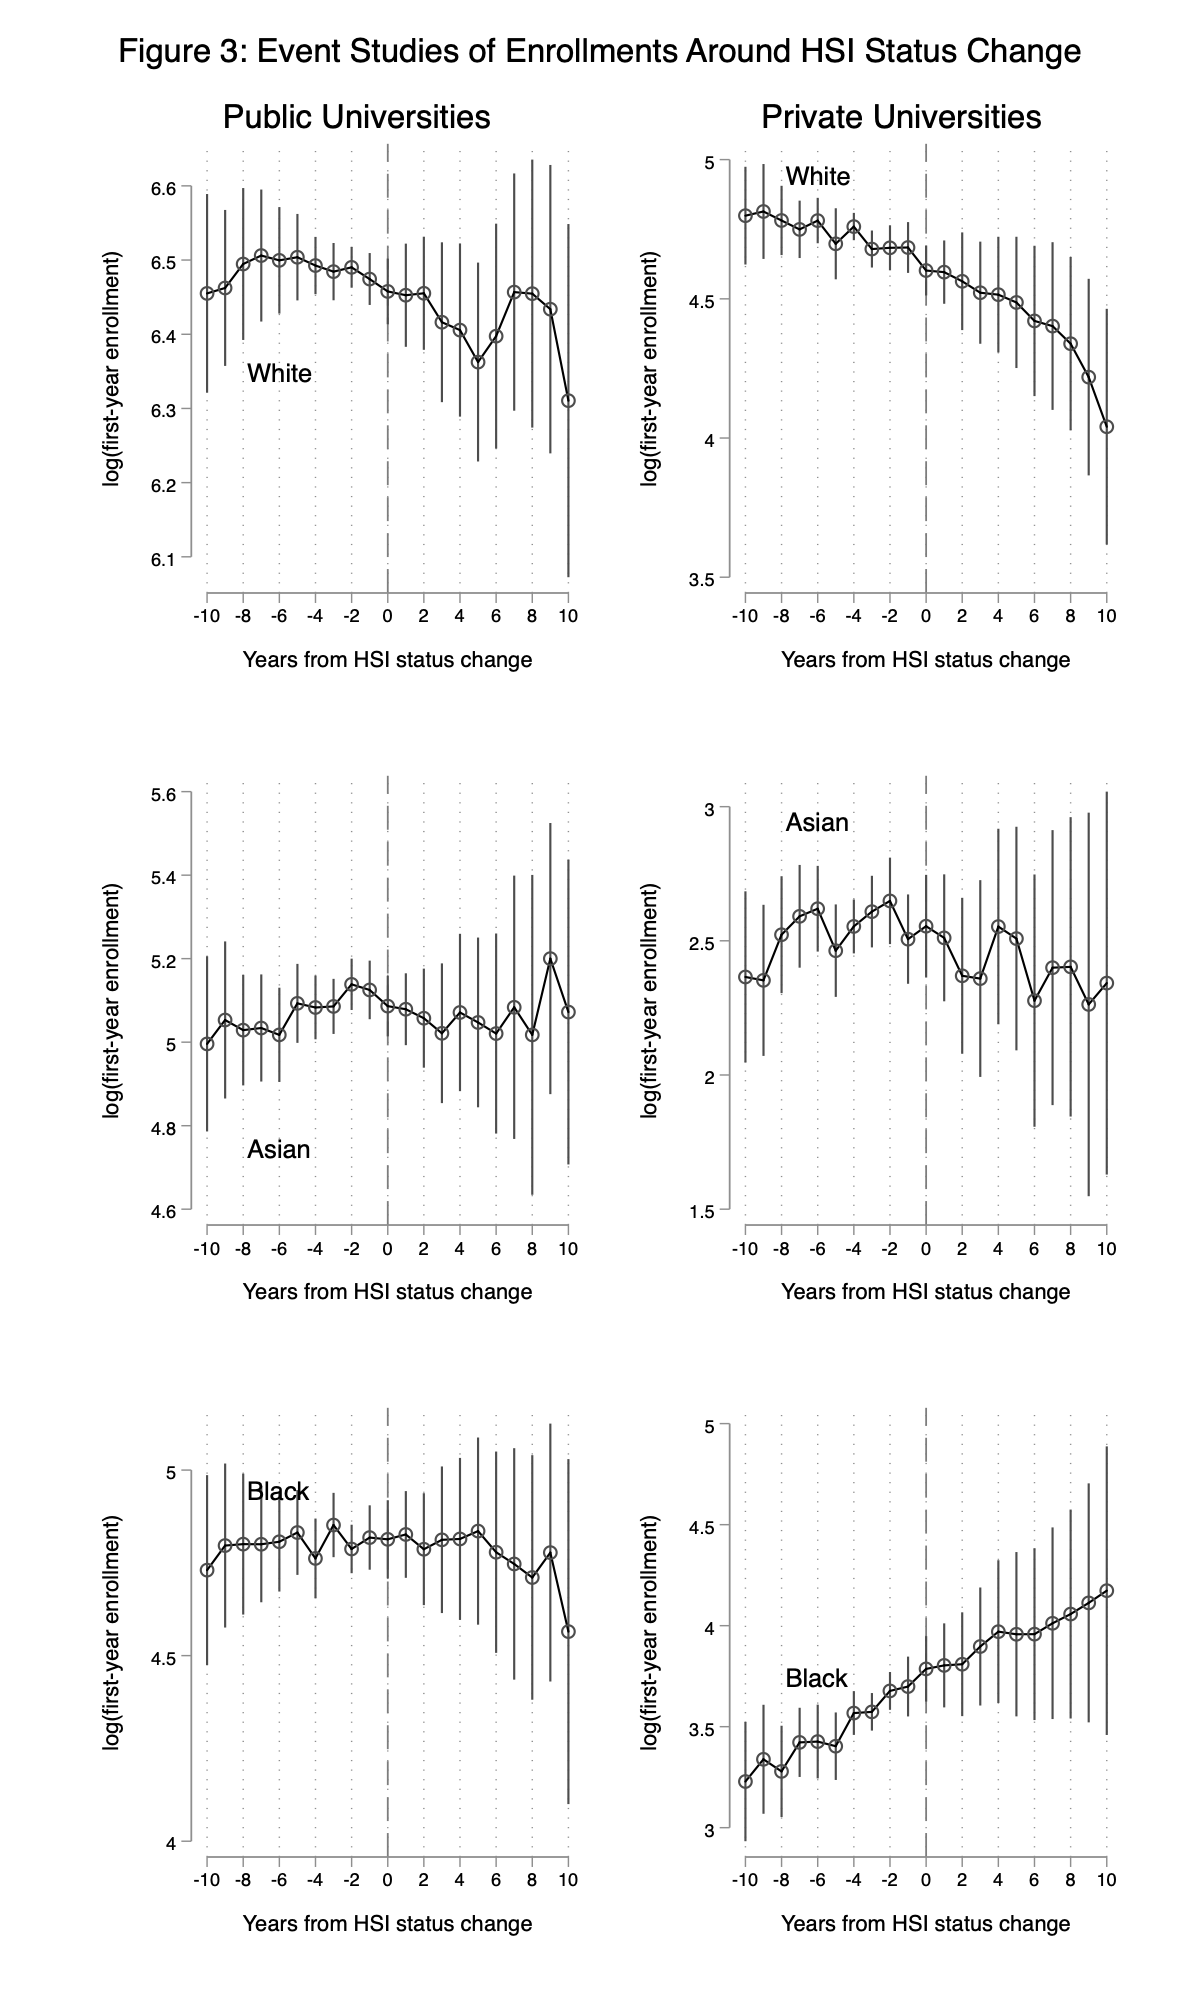

In [13]:
    graph combine r1c1Whitepub r1c2Whitepri r2c1Asianpub r2c2Asianpri r3c1Blackpub r3c2Blackpri, /// 
        col(2) xsize(6) ysize(10) iscale(*.9) imargin(medsmall) graphregion(margin(l=5 r=5)) ///
        title("Figure 3: Event Studies of Enrollments Around HSI Status Change", position(12) ///
        size(small) justification(center))